In [8]:
import pandas as pd
import seaborn as sns
countries = pd.read_csv('countries_clean5.csv')
countries


,country,year,sex,age,suicide_no,population,suicides_per_100k,HDI_for_year,gdp_for_year,gdp_per_capita,generation
0,Argentina,1990,male,75+ years,226,411100,54.97,0.707,1.413520e+11,4859,G.I. Generation
1,Argentina,1990,male,55-74 years,502,2128000,23.59,0.707,1.413520e+11,4859,G.I. Generation
2,Argentina,1990,male,35-54 years,439,3619000,12.13,0.707,1.413520e+11,4859,Silent
3,Argentina,1990,female,75+ years,61,643000,9.49,0.707,1.413520e+11,4859,G.I. Generation
4,Argentina,1990,male,25-34 years,182,2297000,7.92,0.707,1.413520e+11,4859,Boomers
...,...,...,...,...,...,...,...,...,...,...,...
11515,United States,2013,female,25-34 years,1285,20951958,6.13,0.914,1.669150e+13,56520,Millenials
11516,United States,2013,female,15-24 years,975,21698877,4.49,0.914,1.669150e+13,56520,Millenials
11517,United States,2013,female,75+ years,431,11486590,3.75,0.914,1.669150e+13,56520,Silent
11518,United States,2013,male,5-14 years,252,21233001,1.19,0.914,1.669150e+13,56520,Generation Z


In [10]:
df = pd.DataFrame(countries)

#Year is actually a categorical variable; hence it is suitably converted
df['year'] = df['year'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11520 entries, 0 to 11519
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   country            11520 non-null  object  
 1   year               11520 non-null  category
 2   sex                11520 non-null  object  
 3   age                11520 non-null  object  
 4   suicide_no         11520 non-null  int64   
 5   population         11520 non-null  int64   
 6   suicides_per_100k  11520 non-null  float64 
 7   HDI_for_year       11520 non-null  float64 
 8   gdp_for_year       11520 non-null  float64 
 9   gdp_per_capita     11520 non-null  int64   
 10  generation         11520 non-null  object  
dtypes: category(1), float64(3), int64(3), object(4)
memory usage: 912.2+ KB


In [11]:
df.mean()

year                 2.001500e+03
suicide_no           4.016239e+02
population           2.887589e+06
suicides_per_100k    1.356902e+01
HDI_for_year         7.924865e-01
gdp_for_year         8.253307e+11
gdp_per_capita       2.275114e+04
dtype: float64

In [12]:
df.var()

year                 4.792083e+01
suicide_no           1.603234e+06
population           2.572709e+13
suicides_per_100k    3.009772e+02
HDI_for_year         8.732231e-03
gdp_for_year         3.888309e+24
gdp_per_capita       4.180849e+08
dtype: float64

In [4]:
df.std()

year                 6.922487e+00
suicide_no           1.266189e+03
population           5.072188e+06
suicides_per_100k    1.734870e+01
HDI_for_year         9.344641e-02
gdp_for_year         1.971880e+12
gdp_per_capita       2.044712e+04
dtype: float64

In [5]:
df.describe()

,suicide_no,population,suicides_per_100k,HDI_for_year,gdp_for_year,gdp_per_capita
count,11520.000000,1.152000e+04,11520.000000,11520.000000,1.152000e+04,11520.000000
mean,401.623872,2.887589e+06,13.569021,0.792486,8.253307e+11,22751.143750
std,1266.188750,5.072188e+06,17.348695,0.093446,1.971880e+12,20447.124069
min,0.000000,4.700000e+03,0.000000,0.477000,1.249062e+09,291.000000
25%,11.000000,3.117188e+05,2.270000,0.726000,3.910153e+10,5605.750000
50%,60.000000,8.104805e+05,8.045000,0.813000,1.894735e+11,20197.000000
75%,238.000000,3.287346e+06,18.182500,0.869000,6.093470e+11,33518.750000
max,22338.000000,4.380521e+07,185.370000,0.946000,1.669150e+13,122729.000000


In [6]:
#Transforming 'sex' to numerical data

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
label = le.fit_transform(df["sex"])
Data = df.drop("sex", axis='columns')
Data["sex"]=label
Data

,country,year,age,suicide_no,population,suicides_per_100k,HDI_for_year,gdp_for_year,gdp_per_capita,generation,sex
0,Argentina,1990,75+ years,226,411100,54.97,0.707,1.413520e+11,4859,G.I. Generation,1
1,Argentina,1990,55-74 years,502,2128000,23.59,0.707,1.413520e+11,4859,G.I. Generation,1
2,Argentina,1990,35-54 years,439,3619000,12.13,0.707,1.413520e+11,4859,Silent,1
3,Argentina,1990,75+ years,61,643000,9.49,0.707,1.413520e+11,4859,G.I. Generation,0
4,Argentina,1990,25-34 years,182,2297000,7.92,0.707,1.413520e+11,4859,Boomers,1
...,...,...,...,...,...,...,...,...,...,...,...
11515,United States,2013,25-34 years,1285,20951958,6.13,0.914,1.669150e+13,56520,Millenials,0
11516,United States,2013,15-24 years,975,21698877,4.49,0.914,1.669150e+13,56520,Millenials,0
11517,United States,2013,75+ years,431,11486590,3.75,0.914,1.669150e+13,56520,Silent,0
11518,United States,2013,5-14 years,252,21233001,1.19,0.914,1.669150e+13,56520,Generation Z,1


In [7]:
#find the columns that can be normalised - numerical values
X_Data = df[["suicide_no","population","suicides_per_100k","HDI_for_year","gdp_for_year","gdp_per_capita"]]
X_Data

,suicide_no,population,suicides_per_100k,HDI_for_year,gdp_for_year,gdp_per_capita
0,226,411100,54.97,0.707,1.413520e+11,4859
1,502,2128000,23.59,0.707,1.413520e+11,4859
2,439,3619000,12.13,0.707,1.413520e+11,4859
3,61,643000,9.49,0.707,1.413520e+11,4859
4,182,2297000,7.92,0.707,1.413520e+11,4859
...,...,...,...,...,...,...
11515,1285,20951958,6.13,0.914,1.669150e+13,56520
11516,975,21698877,4.49,0.914,1.669150e+13,56520
11517,431,11486590,3.75,0.914,1.669150e+13,56520
11518,252,21233001,1.19,0.914,1.669150e+13,56520


In [8]:
#Normalisation - All data will lie within 0 and 1
#Normalising data using lambda function
Normalised_Data = X_Data.apply(lambda x: (x-x.min(axis=0))/((x.max(axis=0))-x.min(axis=0)))
Normalised_Data

,suicide_no,population,suicides_per_100k,HDI_for_year,gdp_for_year,gdp_per_capita
0,0.010117,0.009278,0.296542,0.490405,0.008394,0.037309
1,0.022473,0.048477,0.127259,0.490405,0.008394,0.037309
2,0.019653,0.082517,0.065437,0.490405,0.008394,0.037309
3,0.002731,0.014573,0.051195,0.490405,0.008394,0.037309
4,0.008148,0.052335,0.042725,0.490405,0.008394,0.037309
...,...,...,...,...,...,...
11515,0.057525,0.478242,0.033069,0.931770,1.000000,0.459245
11516,0.043648,0.495295,0.024222,0.931770,1.000000,0.459245
11517,0.019294,0.262141,0.020230,0.931770,1.000000,0.459245
11518,0.011281,0.484659,0.006420,0.931770,1.000000,0.459245


In [9]:
from sklearn.preprocessing import MinMaxScaler
Scaling = MinMaxScaler()
normalised_array = Scaling.fit_transform(X_Data)
normalised_array

array([[0.01011729, 0.00927843, 0.29654205, 0.49040512, 0.0083943 ,
        0.03730868],
       [0.02247292, 0.0484766 , 0.127259  , 0.49040512, 0.0083943 ,
        0.03730868],
       [0.01965261, 0.0825173 , 0.06543669, 0.49040512, 0.0083943 ,
        0.03730868],
       ...,
       [0.01929448, 0.26214053, 0.02022981, 0.93176972, 1.        ,
        0.45924468],
       [0.01128122, 0.48465872, 0.00641959, 0.93176972, 1.        ,
        0.45924468],
       [0.00640165, 0.46355556, 0.00377623, 0.93176972, 1.        ,
        0.45924468]])

In [10]:
#Standardisation - Scale down distribution with the parameters of standard normal distribution
# Mean = 0; Variance/SD = 1
Standardised_Data = X_Data.apply(lambda x: (x-x.mean(axis=0))/(x.std(axis=0)))
Standardised_Data

,suicide_no,population,suicides_per_100k,HDI_for_year,gdp_for_year,gdp_per_capita
0,-0.138703,-0.488249,2.386403,-0.914818,-0.346866,-0.875045
1,0.079274,-0.149756,0.577621,-0.914818,-0.346866,-0.875045
2,0.029519,0.144200,-0.082947,-0.914818,-0.346866,-0.875045
3,-0.269015,-0.442529,-0.235120,-0.914818,-0.346866,-0.875045
4,-0.173453,-0.116437,-0.325616,-0.914818,-0.346866,-0.875045
...,...,...,...,...,...,...
11515,0.697665,3.561455,-0.428794,1.300355,8.046216,1.651521
11516,0.452836,3.708713,-0.523326,1.300355,8.046216,1.651521
11517,0.023200,1.695324,-0.565980,1.300355,8.046216,1.651521
11518,-0.118169,3.616864,-0.713542,1.300355,8.046216,1.651521


In [11]:
from sklearn.preprocessing import StandardScaler
scaling = StandardScaler()
standardised_data = scaling.fit_transform(X_Data)
standardised_data

array([[-0.13870878, -0.4882698 ,  2.38650664, -0.91485775, -0.34688141,
        -0.8750825 ],
       [ 0.07927766, -0.14976212,  0.57764656, -0.91485775, -0.34688141,
        -0.8750825 ],
       [ 0.02951989,  0.14420662, -0.08295052, -0.91485775, -0.34688141,
        -0.8750825 ],
       ...,
       [ 0.02320144,  1.69539748, -0.56600493,  1.30041188,  8.04656536,
         1.65159276],
       [-0.11817382,  3.6170207 , -0.71357287,  1.30041188,  8.04656536,
         1.65159276],
       [-0.20426267,  3.43477802, -0.74181829,  1.30041188,  8.04656536,
         1.65159276]])

In [12]:
Standardised_Data.mean()

suicide_no           1.264332e-15
population           6.383782e-17
suicides_per_100k    4.172289e-15
HDI_for_year         4.281745e-14
gdp_for_year        -4.151309e-15
gdp_per_capita       1.407863e-15
dtype: float64

In [13]:
Standardised_Data.std()

suicide_no           1.0
population           1.0
suicides_per_100k    1.0
HDI_for_year         1.0
gdp_for_year         1.0
gdp_per_capita       1.0
dtype: float64

1.4726533174408323

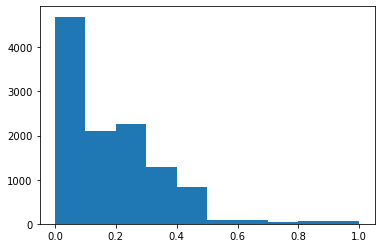

In [14]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

plt.hist(Normalised_Data.gdp_per_capita)
stats.skew(Normalised_Data.gdp_per_capita)

1.472653317440832

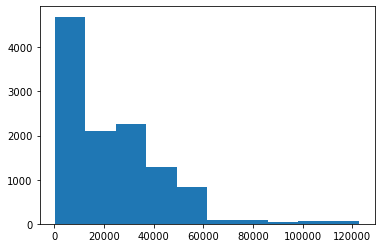

In [15]:
plt.hist(countries.gdp_per_capita)
stats.skew(countries.gdp_per_capita)

-0.7054349481273179

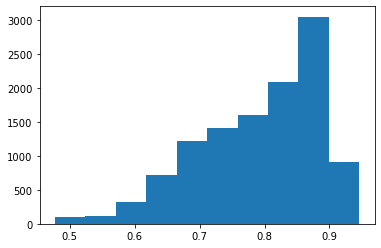

In [16]:
plt.hist(countries.HDI_for_year)
stats.skew(countries.HDI_for_year)

In [17]:
#Normalising graphs
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [18]:
def diagnostic_plots(countries, variable):
    # plot histogram and Q-Q plot side by side
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    countries[variable].hist()
    
    plt.subplot(1,2,2)
    stats.probplot(countries[variable], dist="norm", plot=plt)
    
    plt.show()

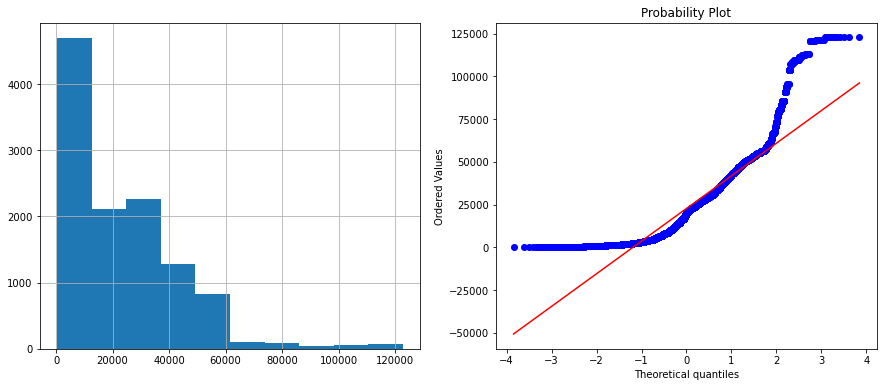

In [19]:
#Actual plot without normalising
diagnostic_plots(countries,"gdp_per_capita")

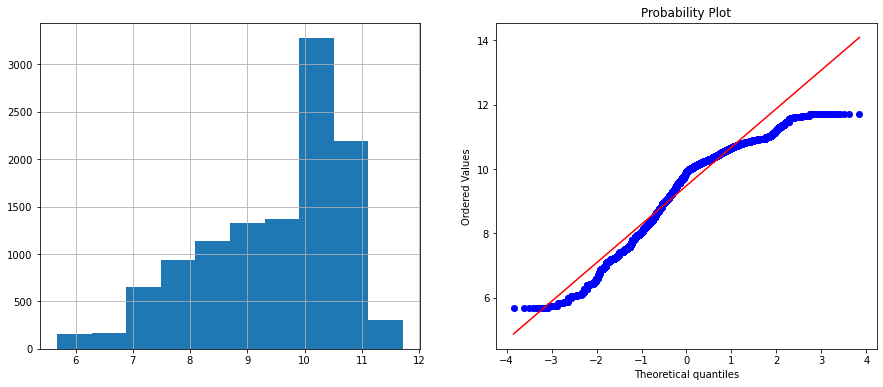

In [20]:
countries['gdp_per_capita_log'] = np.log(countries['gdp_per_capita']+1)
diagnostic_plots(countries,"gdp_per_capita_log")

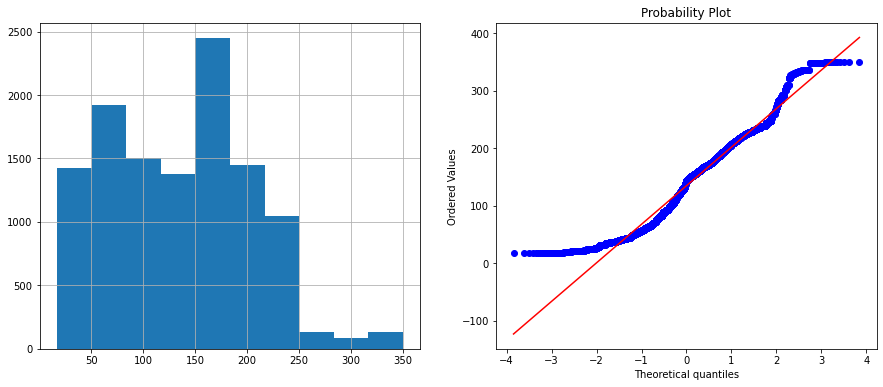

In [21]:
countries['gdp_per_capita_sqr'] = countries['gdp_per_capita']**(1/2)
diagnostic_plots(countries,"gdp_per_capita_sqr")

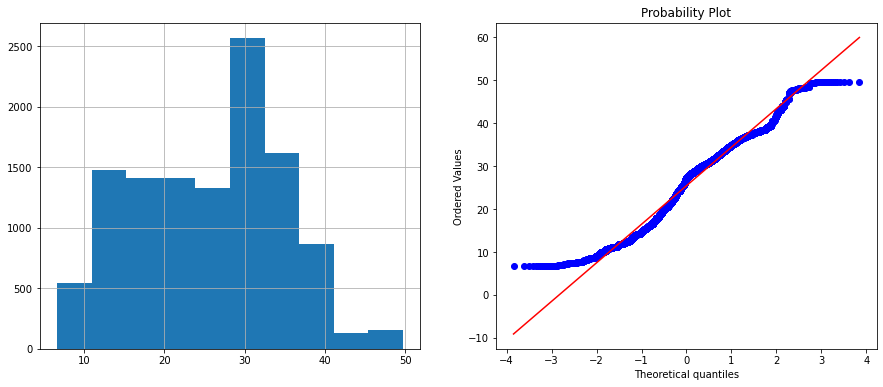

In [22]:
countries['gdp_per_capita_exp'] = countries['gdp_per_capita']**(1/3)
diagnostic_plots(countries,"gdp_per_capita_exp")

In [23]:
stats.skew(countries.gdp_per_capita_sqr)

0.29138415599834444

In [24]:
#Best normalisation
stats.skew(countries.gdp_per_capita_exp)

-0.045139361868547084